# Бесконечно большая функция (б.б.ф.)

## Простыми словами:

Функция называется **бесконечно большой** при x → a, если:
- Когда x приближается к точке a
- Значение функции |f(x)| становится **сколь угодно большим**

**Что это значит практически?**

Представьте, что вы задаете любое большое число M (например, 100, 1000, миллион).
Математика гарантирует, что вы сможете подойти к точке a достаточно близко (на расстояние меньше δ),
и функция будет больше вашего M по модулю.

**Главная идея:** какое бы огромное число вы ни выбрали, функция станет еще больше вблизи точки a!


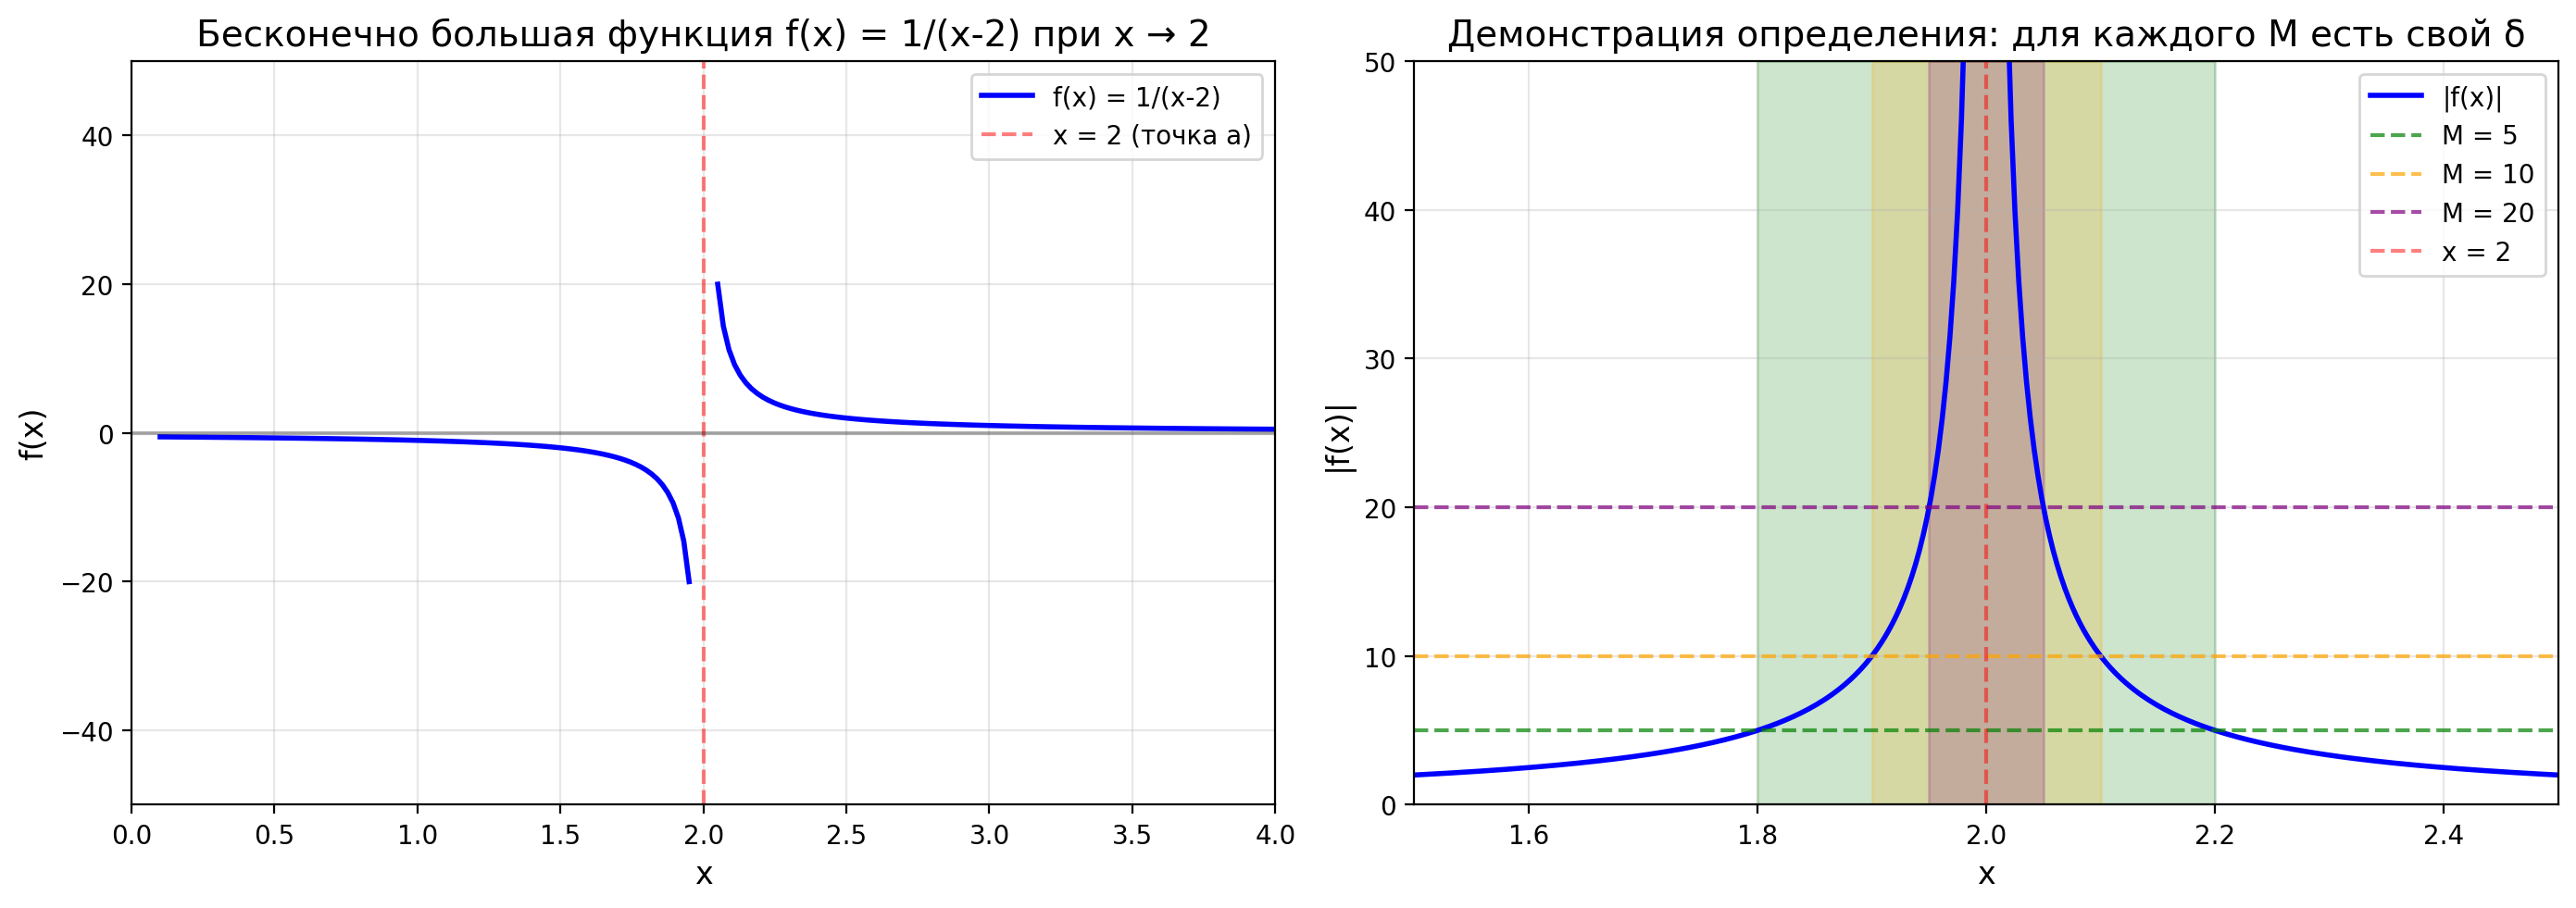

Объяснение графика справа:
────────────────────────────────────────────────────────────
Цветные полосы показывают интервалы (a - δ, a + δ) для разных M:

• M =  5 (цвет: green ) → δ = 0.200
  В интервале (1.800, 2.200) функция |f(x)| > 5
• M = 10 (цвет: orange) → δ = 0.100
  В интервале (1.900, 2.100) функция |f(x)| > 10
• M = 20 (цвет: purple) → δ = 0.050
  В интервале (1.950, 2.050) функция |f(x)| > 20

Видите закономерность? Чем больше M, тем меньше δ!
Но для ЛЮБОГО M мы всегда сможем найти такой δ > 0.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Настройка для Retina дисплеев (четкие графики высокого разрешения)
%config InlineBackend.figure_format = 'retina'

# Рассмотрим классический пример: f(x) = 1/(x-2)
# Эта функция стремится к бесконечности при x → 2

def f(x):
    return 1 / (x - 2)

# Создаем график
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Общий вид функции
x_left = np.linspace(0.1, 1.95, 100)
x_right = np.linspace(2.05, 4, 100)

ax1.plot(x_left, f(x_left), 'b-', linewidth=2, label='f(x) = 1/(x-2)')
ax1.plot(x_right, f(x_right), 'b-', linewidth=2)
ax1.axvline(x=2, color='r', linestyle='--', alpha=0.5, label='x = 2 (точка a)')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 4)
ax1.set_ylim(-50, 50)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('Бесконечно большая функция f(x) = 1/(x-2) при x → 2', fontsize=14)
ax1.legend()

# График 2: Демонстрация определения с конкретными M и δ
a = 2  # точка, к которой стремится x
M_values = [5, 10, 20]  # разные значения M
colors = ['green', 'orange', 'purple']

x_demo = np.linspace(1.5, 2.5, 300)
x_demo = x_demo[np.abs(x_demo - 2) > 0.001]  # убираем точку разрыва

ax2.plot(x_demo, np.abs(f(x_demo)), 'b-', linewidth=2, label='|f(x)|')

for M, color in zip(M_values, colors):
    # Для |f(x)| > M нужно |x - 2| < 1/M
    delta = 1 / M
    
    # Рисуем горизонтальную линию для M
    ax2.axhline(y=M, color=color, linestyle='--', alpha=0.7, label=f'M = {M}')
    
    # Показываем интервал (a - δ, a + δ)
    ax2.axvspan(a - delta, a + delta, alpha=0.2, color=color)
    
ax2.axvline(x=2, color='r', linestyle='--', alpha=0.5, label='x = 2')
ax2.set_xlim(1.5, 2.5)
ax2.set_ylim(0, 50)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('|f(x)|', fontsize=12)
ax2.set_title('Демонстрация определения: для каждого M есть свой δ', fontsize=14)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("Объяснение графика справа:")
print("─" * 60)
print("Цветные полосы показывают интервалы (a - δ, a + δ) для разных M:")
print()
for M, color in zip(M_values, colors):
    delta = 1 / M
    print(f"• M = {M:2d} (цвет: {color:6s}) → δ = {delta:.3f}")
    print(f"  В интервале ({a - delta:.3f}, {a + delta:.3f}) функция |f(x)| > {M}")
print()
print("Видите закономерность? Чем больше M, тем меньше δ!")
print("Но для ЛЮБОГО M мы всегда сможем найти такой δ > 0.")


In [6]:
## Проверим определение на практике

# Давайте проверим определение для нашей функции f(x) = 1/(x-2) при x → 2

def check_definition(M, delta):
    """
    Проверяет, что для всех x из проколотой окрестности
    0 < |x - 2| < delta выполняется |f(x)| > M
    """
    a = 2
    # Берем несколько точек из интервала
    test_points = [
        a - delta/2,
        a - delta/3,
        a + delta/3,
        a + delta/2
    ]
    
    print(f"Проверяем для M = {M}, δ = {delta}")
    print(f"Условие: если 0 < |x - 2| < {delta}, то |f(x)| > {M}")
    print()
    
    all_ok = True
    for x in test_points:
        fx = abs(f(x))
        ok = fx > M
        all_ok = all_ok and ok
        symbol = "✓" if ok else "✗"
        print(f"  x = {x:.4f}: |x-2| = {abs(x-2):.4f}, |f(x)| = {fx:.2f} > {M}? {symbol}")
    
    print()
    if all_ok:
        print(f"✓ Условие выполнено! Для M = {M} подходит δ = {delta}")
    else:
        print(f"✗ Условие не выполнено. Нужно взять меньший δ.")
    print("─" * 60)
    return all_ok

# Примеры проверки
print("ПРИМЕР 1: M = 10")
check_definition(M=10, delta=0.1)  # должно работать
print()

print("ПРИМЕР 2: M = 100")
check_definition(M=100, delta=0.1)  # не сработает
check_definition(M=100, delta=0.01)  # сработает
print()

print("ПРИМЕР 3: M = 1000")
check_definition(M=1000, delta=0.01)  # не сработает
check_definition(M=1000, delta=0.001)  # сработает


ПРИМЕР 1: M = 10
Проверяем для M = 10, δ = 0.1
Условие: если 0 < |x - 2| < 0.1, то |f(x)| > 10

  x = 1.9500: |x-2| = 0.0500, |f(x)| = 20.00 > 10? ✓
  x = 1.9667: |x-2| = 0.0333, |f(x)| = 30.00 > 10? ✓
  x = 2.0333: |x-2| = 0.0333, |f(x)| = 30.00 > 10? ✓
  x = 2.0500: |x-2| = 0.0500, |f(x)| = 20.00 > 10? ✓

✓ Условие выполнено! Для M = 10 подходит δ = 0.1
────────────────────────────────────────────────────────────

ПРИМЕР 2: M = 100
Проверяем для M = 100, δ = 0.1
Условие: если 0 < |x - 2| < 0.1, то |f(x)| > 100

  x = 1.9500: |x-2| = 0.0500, |f(x)| = 20.00 > 100? ✗
  x = 1.9667: |x-2| = 0.0333, |f(x)| = 30.00 > 100? ✗
  x = 2.0333: |x-2| = 0.0333, |f(x)| = 30.00 > 100? ✗
  x = 2.0500: |x-2| = 0.0500, |f(x)| = 20.00 > 100? ✗

✗ Условие не выполнено. Нужно взять меньший δ.
────────────────────────────────────────────────────────────
Проверяем для M = 100, δ = 0.01
Условие: если 0 < |x - 2| < 0.01, то |f(x)| > 100

  x = 1.9950: |x-2| = 0.0050, |f(x)| = 200.00 > 100? ✓
  x = 1.9967: |x-2

True

## Ключевые моменты (важно понять!)

### 1. Что значит "бесконечно большая"?

Это НЕ значит, что функция достигает бесконечности. Это значит, что:
- Функция **растет неограниченно** при приближении к точке a
- Для **любого** наперед заданного большого числа M, функция станет больше этого M

### 2. Логика определения

```
Вы говорите: "Пусть функция будет больше 1000000"
Математика отвечает: "Хорошо, подойди к точке a на расстояние меньше δ = 0.000001"
Вы проверяете: "Действительно, |f(x)| > 1000000! А если я возьму M = 10^100?"
Математика: "Не проблема, вот тебе новый δ..."
```

### 3. Почему это важно?

- δ **зависит от M**: δ = δ(M)
- Чем больше M, тем меньше δ (нужно ближе подходить к точке a)
- Но **всегда** найдется такой δ > 0

### 4. Проколотая окрестность: 0 < |x - a| < δ

**Почему 0 < |x - a|?**
- Мы НЕ включаем саму точку a (в нашем примере x = 2)
- В точке x = 2 функция вообще не определена (деление на ноль)
- Нам важно поведение **вблизи** точки, а не в самой точке

### 5. Модуль |f(x)|

Берем модуль, потому что функция может стремиться к +∞ или к -∞.
В обоих случаях это бесконечно большая функция!


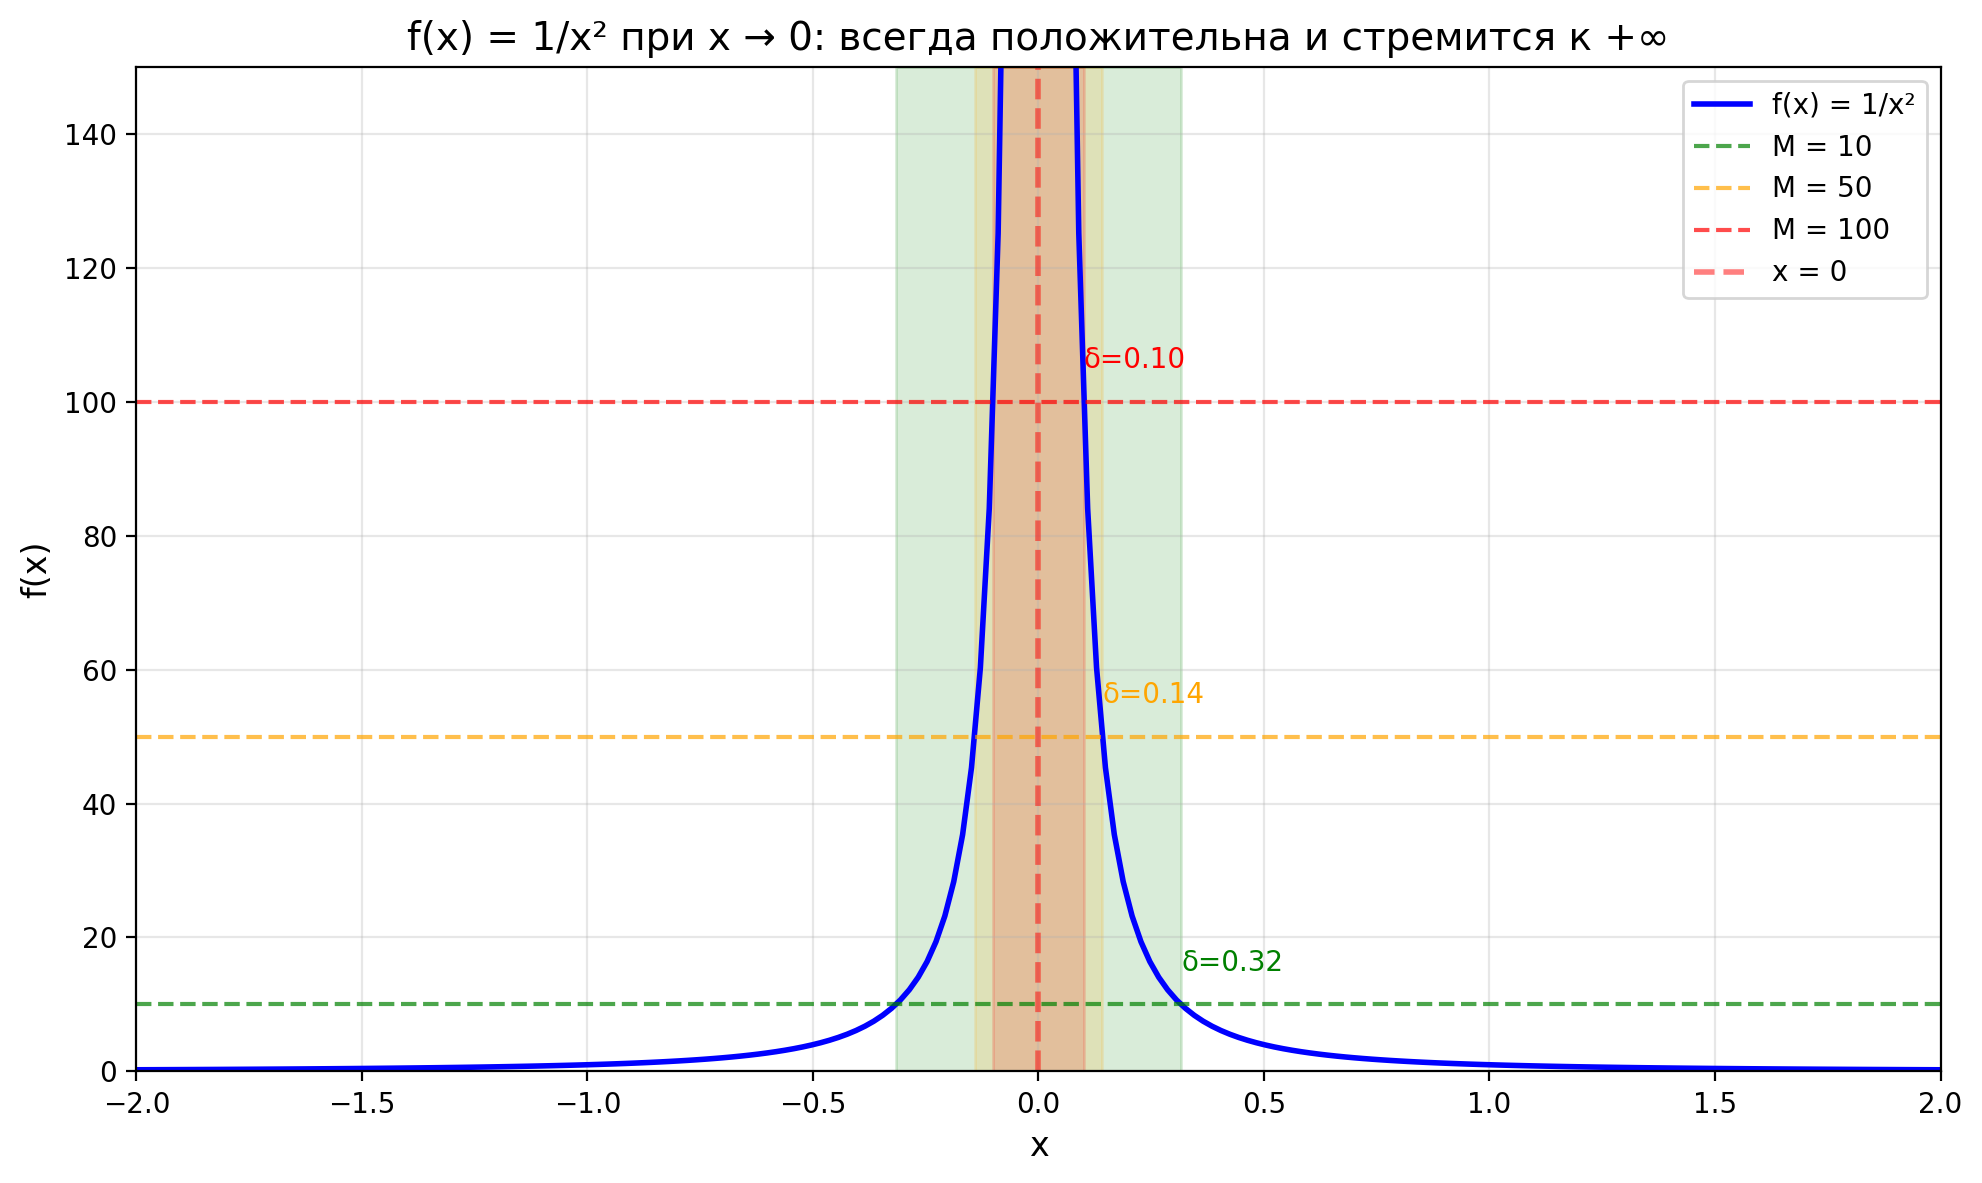

Обратите внимание:
• Эта функция ВСЕГДА положительна (в отличие от 1/(x-2))
• Она симметрична относительно x = 0
• Интервалы δ тоже симметричны: (-δ, δ)
• Чем больше M, тем меньше δ (та же закономерность!)


In [7]:
## Еще один пример: f(x) = 1/x² при x → 0

# Эта функция тоже бесконечно большая, но стремится только к +∞

def g(x):
    return 1 / (x**2)

fig, ax = plt.subplots(figsize=(10, 6))

x1 = np.linspace(-2, -0.05, 100)
x2 = np.linspace(0.05, 2, 100)

ax.plot(x1, g(x1), 'b-', linewidth=2, label='f(x) = 1/x²')
ax.plot(x2, g(x2), 'b-', linewidth=2)

# Показываем несколько уровней M
M_levels = [10, 50, 100]
colors = ['green', 'orange', 'red']

for M, color in zip(M_levels, colors):
    ax.axhline(y=M, color=color, linestyle='--', alpha=0.7, label=f'M = {M}')
    
    # Для 1/x² > M нужно x² < 1/M, т.е. |x| < 1/√M
    delta = 1 / np.sqrt(M)
    
    # Подсвечиваем область
    ax.axvspan(-delta, delta, alpha=0.15, color=color)
    
    # Подписываем δ
    ax.text(delta, M + 5, f'δ={delta:.2f}', color=color, fontsize=10)

ax.axvline(x=0, color='r', linestyle='--', alpha=0.5, linewidth=2, label='x = 0')
ax.set_xlim(-2, 2)
ax.set_ylim(0, 150)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('f(x) = 1/x² при x → 0: всегда положительна и стремится к +∞', fontsize=14)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("Обратите внимание:")
print("• Эта функция ВСЕГДА положительна (в отличие от 1/(x-2))")
print("• Она симметрична относительно x = 0")
print("• Интервалы δ тоже симметричны: (-δ, δ)")
print("• Чем больше M, тем меньше δ (та же закономерность!)")


## 📝 Резюме: как читать определение

Давайте еще раз прочитаем формальное определение, но теперь по частям:

### ∀M > 0

**"Для любого M больше нуля"**
- Это вызов: вы можете выбрать ЛЮБОЕ большое число
- Даже миллион, миллиард, 10^100 — не важно!

### ∃δ(M) > 0

**"Существует δ (зависящее от M), больше нуля"**
- Математика гарантирует: мы найдем такое δ
- δ зависит от вашего выбора M: чем больше M, тем меньше δ
- Но δ всегда будет положительным (не ноль!)

### ∀x: 0 < |x - a| < δ

**"Для всех x из проколотой δ-окрестности точки a"**
- Берем все x, которые близки к a на расстояние меньше δ
- НО исключаем саму точку a (поэтому 0 < |x - a|)

### ⇒ |f(x)| > M

**"Следует, что модуль функции больше M"**
- Вот оно! Функция действительно больше вашего M
- Берем модуль, чтобы учесть и +∞ и -∞

---

### 🎯 Главная мысль

**Определение бесконечно большой функции — это "игра в вызов":**

1. Вы бросаете вызов: "Пусть функция будет больше M!"
2. Математика отвечает: "Принято! Вот тебе δ — подойди так близко к точке a"
3. Вы проверяете: "Вау, действительно работает!"
4. Вы пытаетесь снова с бОльшим M...
5. И так до бесконечности — математика всегда выигрывает! 🎉

Это и означает, что функция **неограниченно растет** при приближении к точке a.
